In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('conc.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
X = df.iloc[: , :-1]
Y = df.iloc[: , -1]

In [5]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [6]:
Y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
Xtrain , Xtest , Ytrain , Ytest  = tts(X , Y , test_size = 0.25)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [20]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(772, 8)
(772,)
(258, 8)
(258,)


In [21]:
from sklearn.linear_model import LinearRegression as lr

In [22]:
model = lr()

In [23]:
model.fit(Xtrain , Ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
for col , cof in zip(df.columns[:-1] , model.coef_):
    print(f"{col}                             :{cof}")

Cement (component 1)(kg in a m^3 mixture)                             :12.26243837155293
Blast Furnace Slag (component 2)(kg in a m^3 mixture)                             :8.820560904131142
Fly Ash (component 3)(kg in a m^3 mixture)                             :5.370344250895609
Water  (component 4)(kg in a m^3 mixture)                             :-3.446832756362917
Superplasticizer (component 5)(kg in a m^3 mixture)                             :1.61850456359081
Coarse Aggregate  (component 6)(kg in a m^3 mixture)                             :1.3454037491504274
Fine Aggregate (component 7)(kg in a m^3 mixture)                             :1.519616829085451
Age (day)                             :7.265332261117298


In [26]:
Ypred = model.predict(Xtest)

In [28]:
Ypred

array([43.54607148, 15.02974263, 22.13129305, 50.96763099, 38.90065549,
       55.40058248, 26.12046535, 39.74133367, 20.75745155, 50.53951233,
       44.21224533, 27.44515901, 30.89388291, 25.0315264 , 43.47822722,
       47.3667234 , 13.34376887, 27.93565208, 17.38902449, 34.65234191,
       60.91542496, 25.81262164, 37.17636993, 33.99962244, 41.03788834,
       19.89144239, 17.15604917, 53.82146811, 28.30415596, 52.87162185,
       65.13035935, 37.36846959, 26.49050841, 22.28611229, 54.21840371,
       26.33681236, 33.84215596, 61.16574909, 16.74696756, 27.80403519,
       35.16133239, 27.36629804, 38.69770798, 48.64249015, 17.90855859,
       62.6971611 , 59.0047971 , 41.9719232 , 41.71406856, 31.88022533,
       56.74736434, 56.92212726, 23.89322272, 34.41461885, 59.26851981,
       25.37454735, 51.55570275, 30.27060921, 34.87247092, 26.46007458,
       15.02530918, 46.0781243 , 29.40292497, 50.617983  , 26.89614879,
       17.3976218 , 35.81072076, 21.24373437, 71.67240424, 31.63

In [29]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [32]:
print(f"Mean Absolute error is : {mean_absolute_error(Ytest , Ypred)}");
print(f"Mean Squared error is : {mean_squared_error(Ytest , Ypred)}");
print(f"r2 score is : {r2_score(Ytest , Ypred)}");

Mean Absolute error is : 7.787981822832032
Mean Squared error is : 100.19314756082544
r2 score is : 0.637450080651041


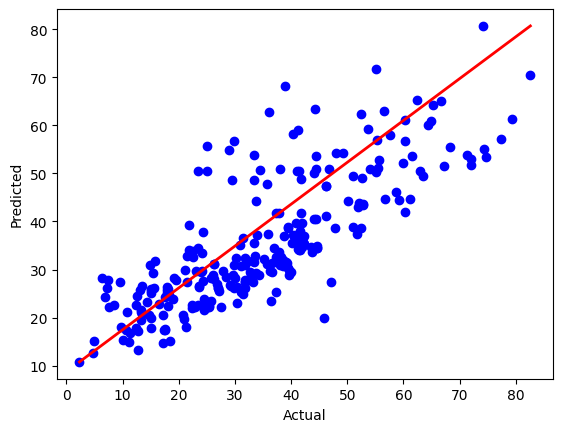

In [34]:
plt.scatter(Ytest , Ypred , color = 'blue')
plt.plot([Ytest.min() , Ytest.max()] , [Ypred.min() , Ypred.max()] , color = 'red' , linewidth = 2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()